# Simulating Sternburg Bingo via Monte Carlo

In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def generate_unique_int(low, high, num):
    rnd_ints = []
    for _ in range(num):
        while True:
            rnd_num = np.random.randint(low, high)
            if rnd_num not in rnd_ints:
                rnd_ints.append(rnd_num)
                break
    return np.array(rnd_ints)

def generate_bingo_matrix():
    return generate_unique_int(0, 100, 25).reshape(5, 5)

def simulate_game():
    play_field = generate_bingo_matrix()
    success_field = np.zeros((5,5))
    for i in range(10000):
        drawn_number = np.random.randint(0, 100)
        success_field = np.where(play_field == drawn_number, 1, success_field)
        if bingo(success_field):
            return i, play_field, success_field
    
def bingo(sf):
    if np.any(sf.sum(axis=0) == 5):
        return True
    elif np.any(sf.sum(axis=1) == 5):
        return True
    elif (sf[0, 0] + sf[1,1] + sf[2,2] + sf[3,3] + sf[4,4] == 5):
        return True
    elif (sf[0, 4] + sf[1,3] + sf[2,2] + sf[3,1] + sf[4,0] == 5):
        return True
    return False

In [110]:
%time
GAMES = 5000
results = []
for _ in range(GAMES):
    draws_needed, _, _ = simulate_game()
    results.append(draws_needed)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


Text(0, 0.5, 'P(Bier_notwendig)')

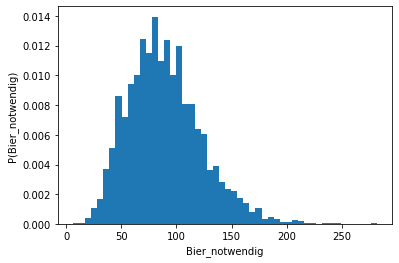

In [111]:
_ = plt.hist(results, bins = 50, density=True)
plt.xlabel("Bier_notwendig")
plt.ylabel("P(Bier_notwendig)")

In [113]:
np.mean(results)

89.3332

On average about 90 beers must be opened to reach bingo!